In [3]:
from zigzag import *
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

In [4]:
from binance.client import Client as Clientb
clientb = Clientb()

In [5]:
coin = 'LRCUSDT'
time = '1h'
interval = '600 days'

In [6]:
df = pd.DataFrame(clientb.get_historical_klines(
    coin, time, interval+' ago UTC')).astype(float)
if len(df) > 1:
    df = df.iloc[:, :6]
    df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    df['RSI'] = np.nan_to_num(df.ta.rsi(period = 14))
    df['MACD'] =np.nan_to_num((df.ta.macd())['MACD_12_26_9'])
    df['Signal'] =np.nan_to_num((df.ta.macd())['MACDs_12_26_9'])
    df['EMA200'] = np.nan_to_num(df.ta.ema(period = 14))
df

,date,open,high,low,close,volume,RSI,MACD,Signal,EMA200
0,2020-11-22 17:00:00,0.19604,0.19606,0.19358,0.19459,450924.8,0.000000,0.000000,0.000000,0.000000
1,2020-11-22 18:00:00,0.19449,0.19663,0.19442,0.19594,410263.6,0.000000,0.000000,0.000000,0.000000
2,2020-11-22 19:00:00,0.19576,0.19727,0.19392,0.19496,829151.9,0.000000,0.000000,0.000000,0.000000
3,2020-11-22 20:00:00,0.19498,0.19680,0.19249,0.19271,731574.1,0.000000,0.000000,0.000000,0.000000
4,2020-11-22 21:00:00,0.19285,0.19424,0.19214,0.19378,456698.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
14377,2022-07-15 12:00:00,0.38130,0.38680,0.37920,0.38570,1276300.0,56.955641,0.003620,0.004154,0.384396
14378,2022-07-15 13:00:00,0.38550,0.38740,0.38030,0.38170,526678.0,51.756534,0.003168,0.003957,0.383906
14379,2022-07-15 14:00:00,0.38170,0.38560,0.38010,0.38130,805618.0,51.252693,0.002745,0.003714,0.383432
14380,2022-07-15 15:00:00,0.38070,0.38330,0.37400,0.37500,1058553.0,43.989287,0.001880,0.003348,0.381899


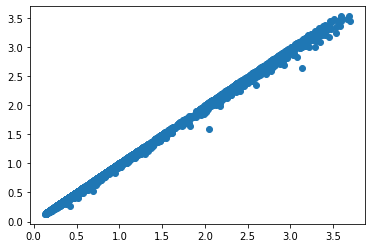

In [7]:
plt.scatter(df.open , df.low)
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

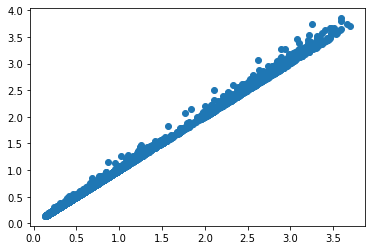

In [9]:
plt.scatter(train.open , train.high)

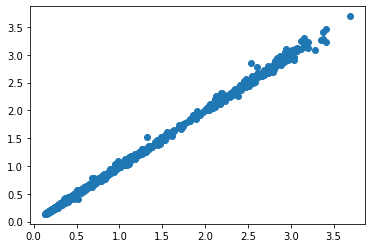

In [10]:
plt.scatter(test.open , test.close)

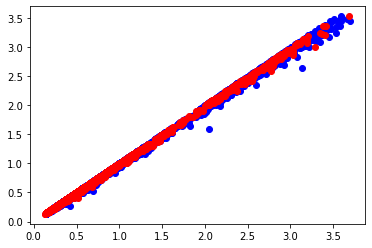

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = plt.scatter(train.open , train.low , color = "blue" )
ax1 = plt.scatter(test.open , test.low , color = "red",)

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['open']])
train_y = np.asanyarray(train[['low']])

regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.98345921]]
Intercept:  [0.00221338]


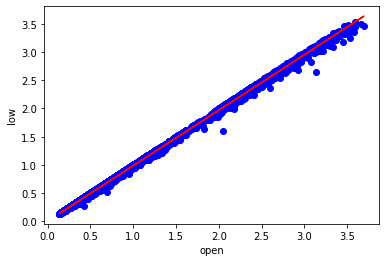

In [13]:
plt.scatter(train.open, train.low,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("open")
plt.ylabel("low")
plt.show()

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['open']])
test_y = np.asanyarray(test[['low']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 1.00


In [15]:
df.tail(10)

,date,open,high,low,close,volume,RSI,MACD,Signal,EMA200
14372,2022-07-15 07:00:00,0.3840,0.3884,0.3829,0.3864,1197842.0,59.503724,0.004647,0.004406,0.383628
14373,2022-07-15 08:00:00,0.3865,0.3904,0.3844,0.3865,991228.0,59.595065,0.004592,0.004443,0.384151
14374,2022-07-15 09:00:00,0.3866,0.3928,0.3861,0.3871,1557441.0,60.175476,0.004544,0.004464,0.384687
14375,2022-07-15 10:00:00,0.3870,0.3885,0.3834,0.3848,755308.0,56.806774,0.004271,0.004425,0.384707
14376,2022-07-15 11:00:00,0.3847,0.3870,0.3809,0.3814,1694360.0,52.158381,0.003738,0.004288,0.384106
14377,2022-07-15 12:00:00,0.3813,0.3868,0.3792,0.3857,1276300.0,56.955641,0.003620,0.004154,0.384396
14378,2022-07-15 13:00:00,0.3855,0.3874,0.3803,0.3817,526678.0,51.756534,0.003168,0.003957,0.383906
14379,2022-07-15 14:00:00,0.3817,0.3856,0.3801,0.3813,805618.0,51.252693,0.002745,0.003714,0.383432
14380,2022-07-15 15:00:00,0.3807,0.3833,0.3740,0.3750,1058553.0,43.989287,0.001880,0.003348,0.381899
14381,2022-07-15 16:00:00,0.3750,0.3776,0.3728,0.3732,719715.0,42.151264,0.001038,0.002886,0.380317


In [16]:
regr.predict(np.asanyarray(df[['open']].tail(10)))

array([[0.37986171],
       [0.38232036],
       [0.38241871],
       [0.38281209],
       [0.38055013],
       [0.37720637],
       [0.3813369 ],
       [0.37759976],
       [0.3766163 ],
       [0.37101058]])

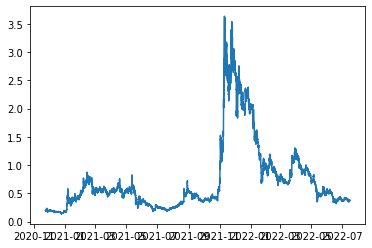

In [17]:
plt.plot(df.date , regr.predict(np.asanyarray(df[['open']])))

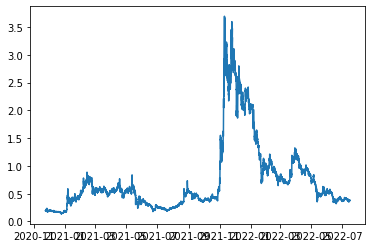

In [18]:
plt.plot(df.date , df.open)